**PREPROCESSING DATA**

Preprocessing Dataincludes importing the dataset, cleaning missing values, checking and handling outliers, encoding categorical variables, and preparing the data for modeling



In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import plot_importance

In [2]:
#Import Data
EP = pd.read_csv("/content/Employee_Promotion.csv")
EP.head(15)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,0,54,0


In [3]:
EP.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


In [4]:
EP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [5]:
EP.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [6]:
#Check Data shape
EP.shape

(54808, 13)

In [7]:
#Check Duplicate
EP.duplicated().sum()

np.int64(0)

In [8]:
#Check Null
EP.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [9]:
EP.isna().any()

,0
employee_id,False
department,False
region,False
education,True
gender,False
recruitment_channel,False
no_of_trainings,False
age,False
previous_year_rating,True
length_of_service,False


In [10]:
#Check Value of Target Columns
EP['is_promoted'].value_counts()

,count
is_promoted,
0,50140
1,4668


In [11]:
EP['is_promoted']=EP['is_promoted'].map({0:'NO', 1:'YES'})

In [12]:
EP['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [13]:
EP['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [14]:
EP['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [15]:
EP['education'].isnull().sum()

np.int64(2409)

In [16]:
EP['education'].fillna(method='ffill', inplace=True)

/tmp/ipython-input-262157450.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  EP['education'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-262157450.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  EP['education'].fillna(method='ffill', inplace=True)


In [17]:
EP['education'].value_counts()

,count
education,
Bachelor's,38390
Master's & above,15579
Below Secondary,839


In [18]:
EP['education'].isnull().sum()

np.int64(0)

In [19]:
EP['gender'].unique()

array(['f', 'm'], dtype=object)

In [20]:
EP['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [21]:
EP['no_of_trainings'].unique()

array([ 1,  2,  3,  4,  7,  5,  6,  8, 10,  9])

In [22]:
EP['age'].unique()

array([35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 41, 27, 29, 26, 24,
       57, 40, 42, 23, 59, 44, 50, 56, 20, 25, 47, 36, 46, 60, 43, 22, 54,
       58, 48, 53, 55, 51, 52, 21])

In [23]:
EP['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [24]:
EP['previous_year_rating'].fillna(EP['previous_year_rating'].median(), inplace=True)

/tmp/ipython-input-3511166166.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  EP['previous_year_rating'].fillna(EP['previous_year_rating'].median(), inplace=True)


In [25]:
EP['previous_year_rating'].value_counts()

,count
previous_year_rating,
3.0,22742
5.0,11741
4.0,9877
1.0,6223
2.0,4225


In [26]:
EP['length_of_service'].unique()

array([ 8,  4,  7, 10,  2,  5,  6,  1,  3, 16,  9, 11, 26, 12, 17, 14, 13,
       19, 15, 23, 18, 20, 22, 25, 28, 24, 31, 21, 29, 30, 34, 27, 33, 32,
       37])

In [27]:
EP['awards_won?'].unique()

array([0, 1])

In [28]:
EP['avg_training_score'].unique()

array([49, 60, 50, 73, 85, 59, 63, 83, 54, 77, 80, 84, 51, 46, 75, 57, 70,
       68, 79, 44, 72, 61, 48, 58, 87, 47, 52, 88, 71, 65, 62, 53, 78, 91,
       82, 69, 55, 74, 86, 90, 92, 67, 89, 56, 76, 81, 45, 64, 39, 94, 93,
       66, 95, 42, 96, 40, 99, 43, 97, 41, 98])

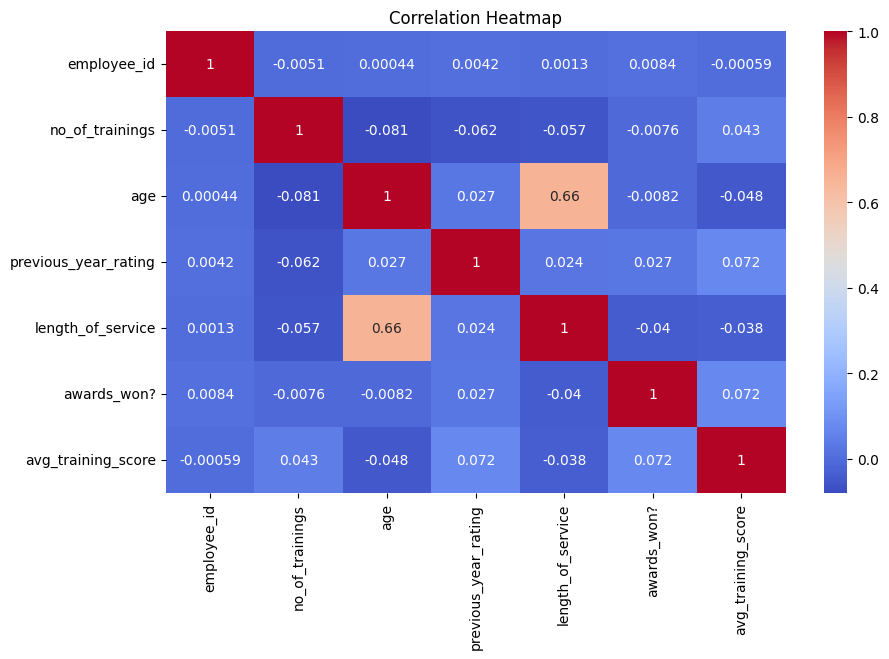

In [29]:
numeric_cols = EP.select_dtypes(include='number')  # pilih kolom numerik
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
EP = EP.drop(['employee_id', 'gender'], axis=1)
EP.head(15)

,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,sourcing,1,35,5.0,8,0,49,NO
1,Operations,region_22,Bachelor's,other,1,30,5.0,4,0,60,NO
2,Sales & Marketing,region_19,Bachelor's,sourcing,1,34,3.0,7,0,50,NO
3,Sales & Marketing,region_23,Bachelor's,other,2,39,1.0,10,0,50,NO
4,Technology,region_26,Bachelor's,other,1,45,3.0,2,0,73,NO
5,Analytics,region_2,Bachelor's,sourcing,2,31,3.0,7,0,85,NO
6,Operations,region_20,Bachelor's,other,1,31,3.0,5,0,59,NO
7,Operations,region_34,Master's & above,sourcing,1,33,3.0,6,0,63,NO
8,Analytics,region_20,Bachelor's,other,1,28,4.0,5,0,83,NO
9,Sales & Marketing,region_1,Master's & above,sourcing,1,32,5.0,5,0,54,NO


In [31]:
EP.duplicated().sum()

np.int64(502)

In [32]:
#Drop duplicate
EP.drop_duplicates(keep='first', inplace=True)

In [33]:
EP.duplicated().sum()

np.int64(0)

In [34]:
EP['is_promoted'].value_counts()

,count
is_promoted,
NO,49642
YES,4664


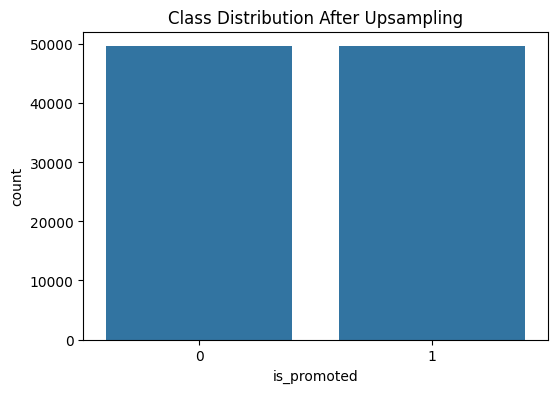

In [35]:
import pandas as pd
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

# Ubah target ke numerik
EP['is_promoted'] = EP['is_promoted'].map({'NO':0, 'YES':1})

# Pisahkan majority/minority
EP_majority = EP[EP['is_promoted']==0]
EP_minority = EP[EP['is_promoted']==1]

# Upsample minority
EP_minority_upsampled = resample(
    EP_minority,
    replace=True,
    n_samples=len(EP_majority),
    random_state=42
)

# Gabungkan
EP1 = pd.concat([EP_majority, EP_minority_upsampled])
EP1 = EP1.sample(frac=1, random_state=42).reset_index(drop=True)

# Visualisasi
plt.figure(figsize=(6,4))
sns.countplot(x='is_promoted', data=EP1)
plt.title('Class Distribution After Upsampling')
plt.show()


In [36]:
EP1['is_promoted'].value_counts()

,count
is_promoted,
0,49642
1,49642


In [37]:
EP = pd.get_dummies(EP1, columns=['department', 'region', 'education', 'recruitment_channel'], dtype=int)    # getting dummies data of these columns

In [38]:
EP.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,32,3.0,6,0,55,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,34,3.0,4,0,48,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,24,3.0,1,0,51,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,1,29,1.0,2,0,52,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,22,3.0,2,0,64,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [39]:
EP.isnull().sum()

,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
awards_won?,0
avg_training_score,0
is_promoted,0
department_Analytics,0
department_Finance,0
department_HR,0


**MODELLING** **XGBoost**

In [40]:
indp_x = EP.drop('is_promoted', axis=1)
dep_y = EP['is_promoted']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(indp_x, dep_y, test_size=0.2, random_state=42)      # splitting tarin and test in 80:20 ratio

Confusion Matrix:
 [7669 2259 3217 6712]


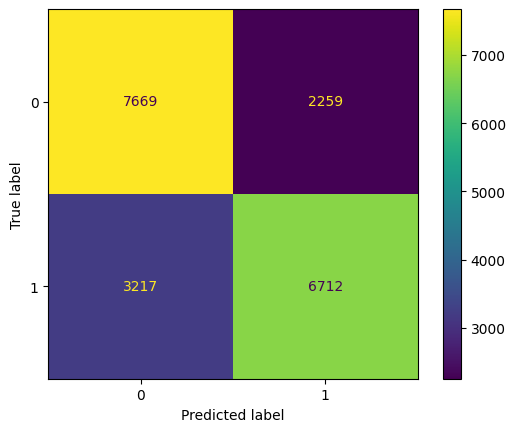

In [42]:
x_train, x_test, y_train, y_test = train_test_split(indp_x, dep_y, test_size=0.2, random_state=42)      # splitting tarin and test in 80:20 ratio
log_reg = make_pipeline(StandardScaler(), LogisticRegression())     #
log_reg.fit(x_train, y_train)

y_predict = log_reg.predict(x_test)
confusion_mat = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:\n', confusion_mat.ravel())
cm = ConfusionMatrixDisplay(confusion_mat)
cm.plot()

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt


In [44]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7242


In [45]:
# Calculate and print precision, recall, and F1 score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print(f'precision: {precision:.4f}')
print(f'recall: {recall:.4f}')
print(f'f1: {f1:.4f}')

precision: 0.7482
recall: 0.6760
f1: 0.7103


In [46]:
# Calculate and print ROC AUC
roc_auc = roc_auc_score(y_test, y_predict)
print(f'ROC AUC: {roc_auc:.4f}')

ROC AUC: 0.7242


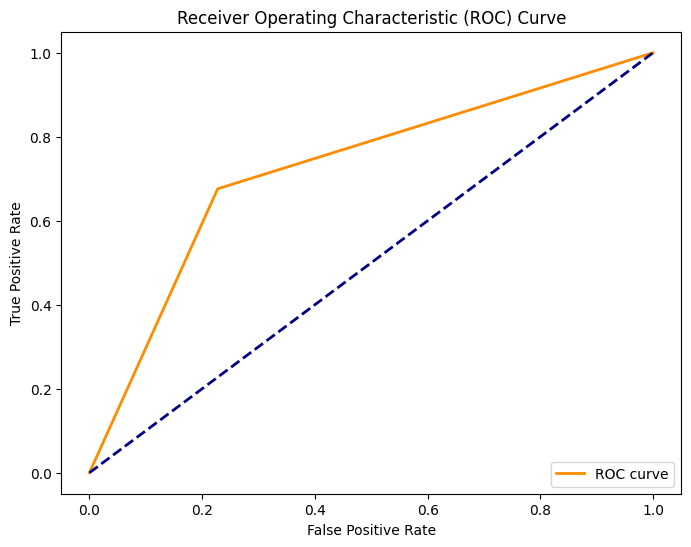

In [47]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [48]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[7669 2259]
 [3217 6712]]


In [49]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.77      0.74      9928
           1       0.75      0.68      0.71      9929

    accuracy                           0.72     19857
   macro avg       0.73      0.72      0.72     19857
weighted avg       0.73      0.72      0.72     19857



In [50]:
# Creating a DMatrix for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)


In [51]:
# XGBoost parameters
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 10,  # Number of classes
    'max_depth': 6,  # Maximum depth of trees
    'eta': 0.3,  # Learning rate
}

num_round = 100  # Number of boosting rounds

In [52]:
# Training the XGBoost model
xgmodel = xgb.train(params, dtrain, num_round)
y_pred = xgmodel.predict(dtest)


In [98]:
print(y_pred)

[0. 0. 1. ... 0. 1. 1.]


In [53]:
# Evaluating the model's performance
xg_accuracy = accuracy_score(y_test, y_pred)
xg_precision = precision_score(y_test, y_pred)
xg_recall = recall_score(y_test, y_pred)
xg_f1 = f1_score(y_test, y_pred)

print("Validation Accuracy:", xg_accuracy)
print("Validation Precision:", xg_precision)
print("Validation Recall:", xg_recall)
print("Validation F1-Score:", xg_f1)

Validation Accuracy: 0.822581457420557
Validation Precision: 0.839157136806438
Validation Recall: 0.798166985597744
Validation F1-Score: 0.8181489702162804


In [54]:
# comparing Accuracies of both models.
labels = ['Logistic Regression Model', 'XGBoost Model']
accuracy_scores = [accuracy, xg_accuracy]

In [55]:
# Add other metrics to the lists if needed
precision_scores = [precision, xg_precision]
recall_scores = [recall, xg_recall]
f1_scores = [f1, xg_f1]


In [100]:
X_test_copy = x_test.copy()
X_test_copy['Actual'] = y_test
X_test_copy['Predicted'] = y_pred
X_test_copy.head(10)

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,Actual,Predicted
43486,1,30,3.0,4,0,51,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0.0
85918,1,29,5.0,5,0,48,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0.0
58381,2,34,5.0,2,0,88,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1.0
31462,1,38,4.0,3,0,69,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0.0
28607,1,52,5.0,6,0,47,0,0,1,0,...,0,0,0,0,1,0,0,1,1,1.0
16323,1,42,5.0,3,0,69,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1.0
95224,1,28,1.0,6,0,71,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0.0
37829,3,31,3.0,5,0,86,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0.0
39964,1,27,5.0,4,0,74,0,1,0,0,...,0,0,1,0,0,0,0,1,1,1.0
87812,1,34,5.0,3,1,72,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1.0


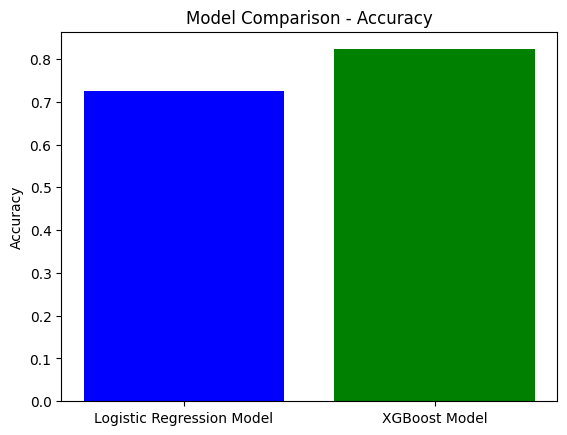

In [56]:
# Bar plot for accuracy
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.show()

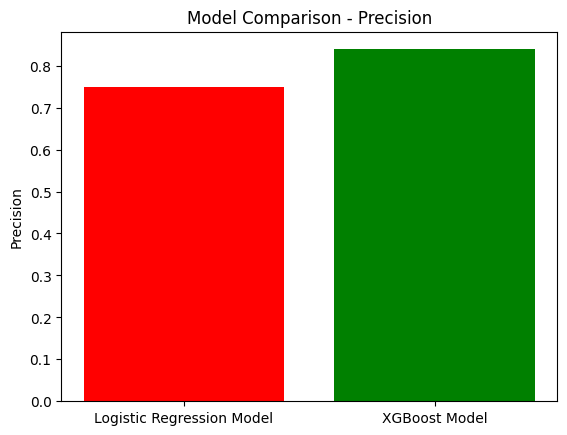

In [57]:
# precision
plt.bar(labels, precision_scores, color=['red', 'green'])
plt.title('Model Comparison - Precision')
plt.ylabel('Precision')
plt.show()

<Figure size 1000x800 with 0 Axes>

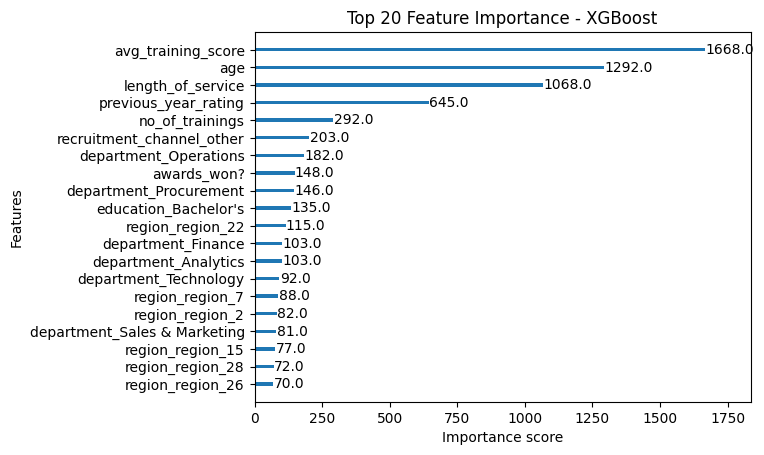

In [69]:
plt.figure(figsize=(10,8))
plot_importance(xgmodel, max_num_features=20)  # ganti xgb_model → xgmodel
plt.title("Top 20 Feature Importance - XGBoost")
plt.grid(False)
plt.show()

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

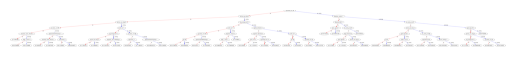

In [102]:
from xgboost import plot_tree

plt.figure(figsize=(20,10))           # ukuran besar supaya terbaca
plot_tree(xgmodel, num_trees=0)       # 0 = tree pertama
plt.show()